#Pré-Processamento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import math
import plotly.express as px
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IEEE/winequality.csv")
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'wine_is_red'],
      dtype='object')

Para criarmos o KNN, faz necessário normalizar os dados, tratar os dados, One-Hot encoder e etc. Pois o KNN precisa ter valores em intervalos iguais, para podermos executá-lo.


## Verificação de Dados faltantes

In [ ]:
nan = df.isna()
np.unique(nan.to_numpy(), return_counts=False) # obtendo os valores únicos de faltantes e não faltantes
                                              # convertendo da pandas para a numpy

array([False])

Sem números faltantes


##Normalização


Em caso de normalização, gostaria de salvar o DataFrame antes de modifica-lo com a normalização, por isso farei uma cópia.


O tipo de normalização que irei usar é a MinMaxScaler, pois os nossos dados não podem ser "negativos"


In [ ]:
df_1 = df.copy()

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
df = min_max_scaler.fit_transform(df)
print(df)

[[0.00000000e+00 1.73553719e-01 3.53333333e-01 ... 4.49275362e-01
  5.00000000e-01 1.00000000e+00]
 [1.53940887e-04 3.63636364e-01 6.13333333e-01 ... 1.44927536e-01
  5.00000000e-01 1.00000000e+00]
 [3.07881773e-04 2.14876033e-01 1.06666667e-01 ... 3.62318841e-01
  5.00000000e-01 0.00000000e+00]
 ...
 [9.99692118e-01 3.38842975e-01 1.66666667e-01 ... 1.15942029e-01
  5.00000000e-01 0.00000000e+00]
 [9.99846059e-01 2.64462810e-01 1.46666667e-01 ... 4.92753623e-01
  3.33333333e-01 0.00000000e+00]
 [1.00000000e+00 2.14876033e-01 9.33333333e-02 ... 3.04347826e-01
  5.00000000e-01 0.00000000e+00]]


In [ ]:
df = pd.DataFrame(df, columns=df_1.columns)
df.head(5)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.000000,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0
1,0.000154,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,0.5,1.0
2,0.000308,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,0.5,0.0
3,0.000462,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,0.5,0.0
4,0.000616,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,0.5,0.0


Podemos perceber que a coluna intitulada "Unamed" é inútil a nossa construção do KNN

In [ ]:
del df["Unnamed: 0"]
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.10299,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0


In [ ]:
df_1 = df.copy()

In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
6492,0.322314,0.160000,0.373494,0.153374,0.044850,0.190972,0.338710,0.206092,0.317829,0.123596,0.130435,0.500000,0.0
6493,0.198347,0.093333,0.168675,0.024540,0.051495,0.079861,0.274194,0.088490,0.364341,0.146067,0.362319,0.500000,0.0
6494,0.338843,0.166667,0.168675,0.475460,0.073090,0.118056,0.391705,0.447079,0.333333,0.089888,0.115942,0.500000,0.0
6495,0.264463,0.146667,0.168675,0.024540,0.054817,0.069444,0.394009,0.087719,0.372093,0.196629,0.492754,0.333333,0.0
6496,0.214876,0.093333,0.295181,0.105828,0.074751,0.142361,0.334101,0.148255,0.426357,0.168539,0.304348,0.500000,0.0


É notável que a coluna Wine_is_red é do tipo binário, ou é ou não é vinho tinto.

Como podem ver, eles são iguais

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  wine_is_red           6497 non-null   float64
dtypes: float64(13)
memory usage: 660.0 KB


# KNN


Vou usar esse espaço aqui para acrescentar o máximo de informação possível. Vou aprendendo escrevendo por aqui.


Passos para construir o KNN:
*   Calcular a distãncia (tem vários métodos, provavelmente usarei o Euclidiano, porém temos : Método de Hamming, Manhattan, de Markosuki e etc).
*   Encontrar os pontos/vizinhos mais próximos.
*   Voltar a label para o ponto a ser previsto.









Para usar essa fórmula necessita-se obter o vetor de cada ponto e tirar a  norma do vetor de diferença.

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_is_red'],
      dtype='object')

In [ ]:
x = np.array(df.drop("wine_is_red", axis=1))
y = np.array(df["wine_is_red"])

In [ ]:
x, y

(array([[0.17355372, 0.35333333, 0.04819277, ..., 0.30898876, 0.44927536,
         0.5       ],
        [0.36363636, 0.61333333, 0.05421687, ..., 0.18539326, 0.14492754,
         0.5       ],
        [0.21487603, 0.10666667, 0.29518072, ..., 0.42696629, 0.36231884,
         0.5       ],
        ...,
        [0.33884298, 0.16666667, 0.1686747 , ..., 0.08988764, 0.11594203,
         0.5       ],
        [0.26446281, 0.14666667, 0.1686747 , ..., 0.19662921, 0.49275362,
         0.33333333],
        [0.21487603, 0.09333333, 0.29518072, ..., 0.16853933, 0.30434783,
         0.5       ]]), array([1., 1., 0., ..., 0., 0., 0.]))

Nesse array 'x' está todas as features como array para trabalhar com as distãncias tranquilamente.




In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,0.5,1.0
2,0.214876,0.106667,0.295181,0.079755,0.073090,0.083333,0.262673,0.136688,0.224806,0.426966,0.362319,0.5,0.0
3,0.231405,0.100000,0.156627,0.010736,0.059801,0.052083,0.281106,0.121265,0.496124,0.213483,0.289855,0.5,0.0
4,0.280992,0.106667,0.174699,0.036810,0.044850,0.055556,0.255760,0.134953,0.496124,0.258427,0.304348,0.5,0.0


In [ ]:
new_data = [0.363636, 0.613333, 0.054217, 0.026074, 0.093023, 0.020833, 0.071429, 0.187777, 0.465116, 0.185393, 0.144928, 0.5]
# new_data = [8.2, 1.00, 0.09, 2.3, 0.065, 7.0, 37.0, 0.99685, 3.32, 0.55, 9.0, 6]

New data point normalizado

In [ ]:
x[0]

array([0.17355372, 0.35333333, 0.04819277, 0.02300613, 0.10299003,
       0.05208333, 0.04147465, 0.12820513, 0.65116279, 0.30898876,
       0.44927536, 0.5       ])

In [ ]:
def KNN(x, y, new_data_point, label = 'wine_is_red', k = 3, dataF = df):
  dataF = df[label]
  distance_index = []
  euclidian_distance=[]
  for i in range(len(df)):
    euclidian_distance = np.linalg.norm( np.array(new_data_point) - np.array(x[i]))
    distance_index.append([euclidian_distance , i])

  distance_index.sort() 
  #Agora será a parte de selecionar os K menores e ver a frequência
  k_minor = distance_index[:k]
  wine_red, wine_white = 0, 0
  for i in range(len(k_minor)):
    index_wine = k_minor[i][1]
    if y[index_wine] == 1:
      wine_red+=1
    else:
      wine_white+=1

  if wine_red > wine_white : print("O vinho é tinto")
  else: print("O vinho não é tinto")


In [ ]:
KNN(x,y, new_data)

O vinho é tinto


#PCA (Principal Component Analysis)

In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.10299,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0


Com o DataFrame normalizado, podemos prosseguir com o PCA

Dividindo o dados

In [ ]:
x = np.array(df.drop('wine_is_red', axis=1))
y = np.array(df['wine_is_red'])

Importando a biblioteca para o PCA.


## Verificando a quantidade ideal de PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

Para que possamos dimensionar os dados de treinamento e também aprender os parâmetros de dimensionamento desses dados, usaremos o .fit()

In [ ]:
pca.fit(x)

PCA(n_components=8)

In [ ]:
pca.components_.shape

(8, 12)

In [ ]:
np.round(pca.explained_variance_ratio_, 2)

array([0.31, 0.22, 0.14, 0.1 , 0.06, 0.05, 0.04, 0.03])

Somatório da porcentagem de cada PCA, interado. Ou seja, somamos a porcentagem do primeiro com o segundo e etc.

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.30608027, 0.52902185, 0.66839446, 0.7680704 , 0.82969659,
       0.88462637, 0.92064461, 0.94796377])

Gráfico de cotovelo abaixo

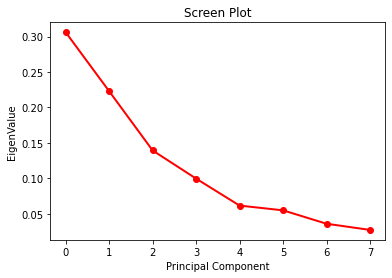

In [ ]:
fig = plt.plot(figsize=(16,9))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Screen Plot")
plt.xlabel('Principal Component')
plt.ylabel('EigenValue')
plt.show()

## Número de componentes ideal


Como podemos observar pela seção anterior, 7 componentes abrange uma maioria substancial do DataFrame. Manter pelo menos 90% dos dados.


In [ ]:
pca = PCA(n_components=7)

In [ ]:
pca.fit(x)

PCA(n_components=7)

In [ ]:
pca.components_.shape

(7, 12)

In [ ]:
print(np.round(pca.explained_variance_ratio_, 2))

print(pca.explained_variance_ratio_.cumsum())

[0.31 0.22 0.14 0.1  0.06 0.05 0.04]
[0.30608027 0.52902185 0.66839446 0.7680704  0.82969659 0.88462637
 0.92064461]


Estou guardando os dados reduzidos com a aplicação do PCA, a título de teste no SVM (Support Vector Machine)

In [ ]:
PCAs = pca.transform(x)

In [ ]:
PCAs

array([[ 0.20462209,  0.31895125, -0.21682696, ..., -0.01916989,
         0.01819455,  0.07296502],
       [-0.09609327,  0.42030149, -0.02019236, ..., -0.23735349,
         0.15205727, -0.05650998],
       [-0.000738  , -0.07961152,  0.1343948 , ...,  0.06298218,
        -0.00401876,  0.25391651],
       ...,
       [-0.34875257, -0.13973946,  0.04757681, ..., -0.08775842,
         0.14708004, -0.20119755],
       [ 0.02635368, -0.05005862, -0.06393324, ...,  0.08529362,
         0.05238877,  0.05444598],
       [-0.05316258, -0.12822638, -0.04181055, ...,  0.08039605,
        -0.0319852 , -0.00657181]])

# Support Vector Machine

SVM ,como é chamado, é uma técnica de aprendizado de máquina (Machine Learning).
"...SVM's do is to find a separating line (or hyperplane) between data of two classes". Então ,basicamente, o SVM calcula a linha de fronteira entre duas classe (features). E essa linha de fronteira pode ser estendida para várias dimensões. 

*   Aprendizado Estatístico
*   Modelo linear para classificação 
*   Envolve o PCA para seleção dos dados.

Basicamente é isso. Pude notar ao estuda-lo que necessitamos dos mesmos procedimentos para o LinearRegression(), PCA - FIT - Predict.

## Testando SVM sem o PCA's

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x, y

(array([[0.17355372, 0.35333333, 0.04819277, ..., 0.30898876, 0.44927536,
         0.5       ],
        [0.36363636, 0.61333333, 0.05421687, ..., 0.18539326, 0.14492754,
         0.5       ],
        [0.21487603, 0.10666667, 0.29518072, ..., 0.42696629, 0.36231884,
         0.5       ],
        ...,
        [0.33884298, 0.16666667, 0.1686747 , ..., 0.08988764, 0.11594203,
         0.5       ],
        [0.26446281, 0.14666667, 0.1686747 , ..., 0.19662921, 0.49275362,
         0.33333333],
        [0.21487603, 0.09333333, 0.29518072, ..., 0.16853933, 0.30434783,
         0.5       ]]), array([1., 1., 0., ..., 0., 0., 0.]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0 )

In [ ]:
classifier = svm.SVR()

Mais uma vez estamos usando o .fit() para treinar nosso algoritmo

In [ ]:
clf = classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
score_precision = r2_score(y_test, y_pred)

### Resultado - Score

In [ ]:
score_precision

0.9497634771346525

## Testando SVM com o PCA's

In [ ]:
df_svm_pca = pd.DataFrame(PCAs, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
df_svm_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.204622,0.318951,-0.216827,-0.109326,-0.019170,0.018195,0.072965
1,-0.096093,0.420301,-0.020192,-0.161780,-0.237353,0.152057,-0.056510
2,-0.000738,-0.079612,0.134395,-0.018717,0.062982,-0.004019,0.253917
3,-0.006653,-0.004125,-0.102477,-0.088278,0.041932,-0.086401,0.039873
4,0.003171,0.023205,-0.055118,-0.101332,0.073216,-0.067030,0.038022
...,...,...,...,...,...,...,...
6492,-0.238335,-0.135784,0.103239,-0.103494,0.028320,0.008335,-0.084883
6493,0.033994,-0.084079,-0.049247,0.017608,-0.036164,-0.085321,0.041773
6494,-0.348753,-0.139739,0.047577,-0.181518,-0.087758,0.147080,-0.201198
6495,0.026354,-0.050059,-0.063933,0.186184,0.085294,0.052389,0.054446


In [ ]:
x_svm_pca = np.array(df_svm_pca)
x_svm_pca, y

(array([[ 0.20462209,  0.31895125, -0.21682696, ..., -0.01916989,
          0.01819455,  0.07296502],
        [-0.09609327,  0.42030149, -0.02019236, ..., -0.23735349,
          0.15205727, -0.05650998],
        [-0.000738  , -0.07961152,  0.1343948 , ...,  0.06298218,
         -0.00401876,  0.25391651],
        ...,
        [-0.34875257, -0.13973946,  0.04757681, ..., -0.08775842,
          0.14708004, -0.20119755],
        [ 0.02635368, -0.05005862, -0.06393324, ...,  0.08529362,
          0.05238877,  0.05444598],
        [-0.05316258, -0.12822638, -0.04181055, ...,  0.08039605,
         -0.0319852 , -0.00657181]]), array([1., 1., 0., ..., 0., 0., 0.]))

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_svm_pca, y, test_size=0.2, random_state=0 )

In [ ]:
classifier_pca = svm.SVR()

In [ ]:
classifier.fit(X_train_pca, y_train_pca)

SVR()

### Resultado - Score

In [ ]:
score_precision = classifier.score(X_test_pca, y_test_pca)
score_precision

0.9348648362945949

# Decision Tree

Assim como SVM, Decision Tree são algoritmos para classificação e regressão, e ainda várias tarefas. No livro indicado para estudo, ele diz que Decision Tree é de suma importância para o Random Forests um dos mais poderosos algoritmos  de Machine Learning.


*   O algoritmo funciona primeiro dividindo o dataSet em dois subdataSet usando somente uma feature e um limiar (no caso desse DataSet, esse limiar poderia ser um valor em "Volatile Length" por exemplo, 0,5, ou algo em torno disso)
*   Isso se repete recursivamente
*   É necessário restringir o grau de liberdade durante o .fit(). Por causa do Overfitting (é quando o modelo aprende demais sobre os dados).
Parãmetros: 
*   min_samples_split : O mínimo de amostras que um nó deve ter quando dividido
*   min_samples_leaf  : O mínimo de amostrar que uma folha deve ter.
*   max_features      : O máximo  número de colunas que são avaliadas para a divisão de cada nós.


Numa arvore de decisão, quanto mais profunda ela for, maior a probabilidade de OverFiting.



Importando as bibliotecas específicas.


In [ ]:
from sklearn.tree  import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,0.5,1.0


## DecisionTreeRegressor



Separando os dados


In [ ]:
label = 'wine_is_red'
X = df.drop(label, axis=1)
y = df[label]


In [ ]:
X_tree_regre_train, X_tree_regre_test, y_tree_regre_train, y_tree_regre_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_tree_regre_train.shape, X_tree_regre_test.shape

((5197, 12), (1300, 12))

In [ ]:
arvore = DecisionTreeRegressor(max_depth = 8, random_state=0)
# arvore = DecisionTreeRegressor(min_samples_leaf= 2000, random_state=0)
arvore.fit(X_tree_regre_train, y_tree_regre_train)

y_tree_regre_pred= arvore.predict(X_tree_regre_test)



## Resultado - Score

In [ ]:
# accuracy_score(y_tree_regre_train, y_tree_regre_pred)
r2_score(y_tree_regre_test, y_tree_regre_pred)

0.9534391048172137

In [ ]:
mean_squared_error(y_tree_regre_test, y_tree_regre_pred)

0.00851130408858777

In [ ]:
# pylab.figure(figsize=(15,10))
# plot_tree(arvore, feature_names= X_train.columns)

A esquerda é a parte que é menor do que 5.02 

## DecisionTreeClassification

A decision tree can combine both numeric and categorical data.

Lembrando que é necessário normalizar o DataSet. Na próxima linha verifico, se está normalizado.

In [ ]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.102990,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0
1,0.363636,0.613333,0.054217,0.026074,0.093023,0.020833,0.071429,0.187777,0.465116,0.185393,0.144928,0.5,1.0


Chamando as bibliotecas para a Árvore de Decisão

In [ ]:
label = 'wine_is_red'

X_tree = np.array(df.drop(label ,axis=1))
y_tree = np.array(df[label])


In [ ]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree, test_size=0.2, random_state=0 )

In [ ]:
TreeClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)#max_depth=6

In [ ]:
TreeClassifier = TreeClassifier.fit(X_tree_train, y_tree_train)

Agora que treinamos o algoritmo, vamos prever.

In [ ]:
#Predict
y_tree_pred = TreeClassifier.predict(X_tree_test)

##Resultado - score

In [ ]:
confu_matrix = confusion_matrix(y_tree_test ,y_tree_pred)
confu_matrix

array([[982,   5],
       [  6, 307]])

In [ ]:
accuracy_score(y_tree_test, y_tree_pred)

0.9915384615384616

In [ ]:
r2_score(y_tree_test, y_tree_pred)

0.9537113465466399

Função Classifier.Score já treina com o test e faz a previsão e compara com o y_test

In [ ]:
score = TreeClassifier.score(X_tree_test, y_tree_test)

In [ ]:
score

0.9915384615384616

## Gráfico da Árvore

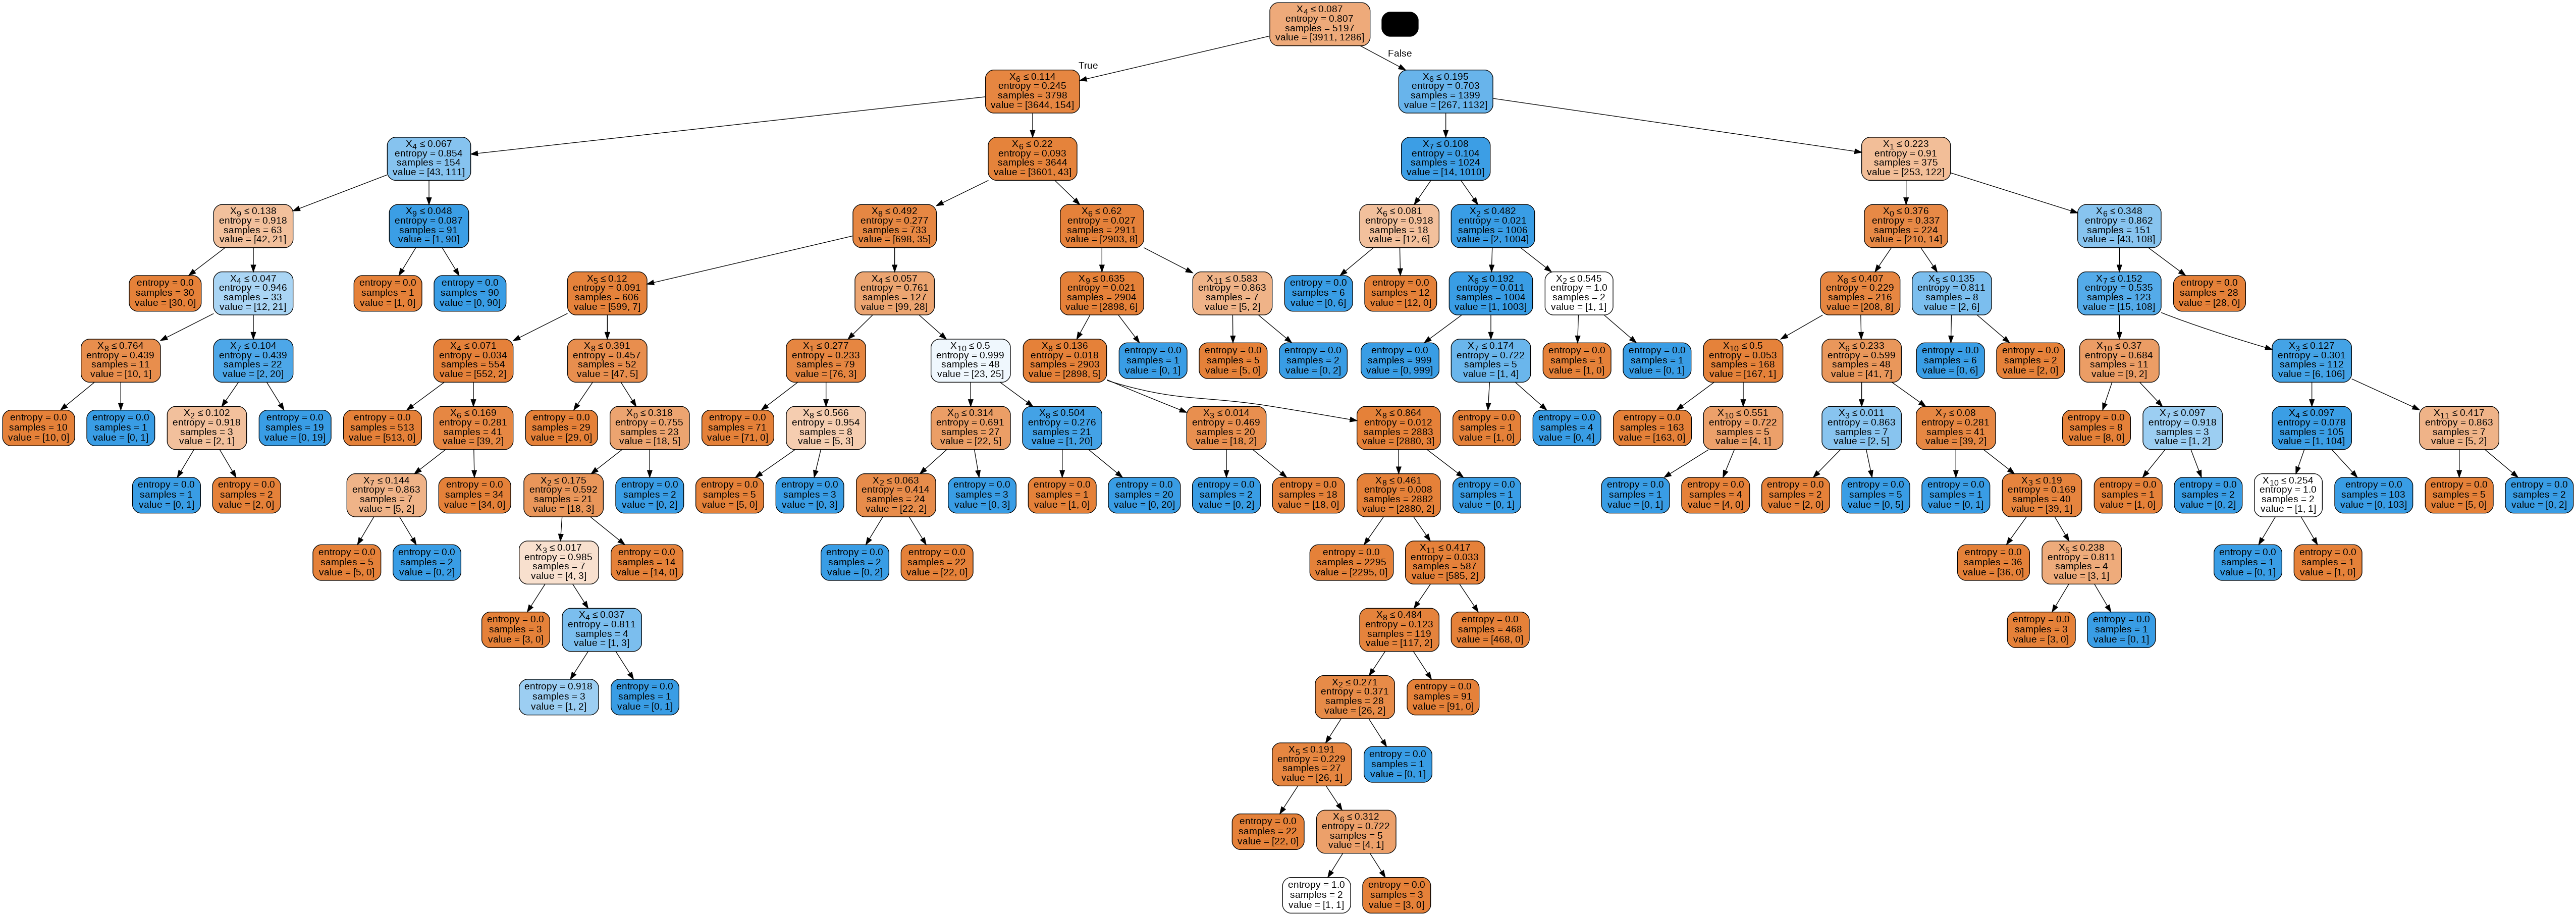

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(TreeClassifier, out_file = dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Random Forest Regressor

Algoritmo extremamente poderoso. Ele faz a previsão levando em consideração várias árvores de decisão durante o .fit, e faz a média das classes com a previsão de várias árvores. Vale ressaltar que é um algoritmo supervisionado.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0.173554,0.353333,0.048193,0.023006,0.10299,0.052083,0.041475,0.128205,0.651163,0.308989,0.449275,0.5,1.0


In [ ]:
label = "quality"
X = df.drop(label, axis=1)
y = df[label]

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
forest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [ ]:
forest.fit(Xtrain, ytrain)

RandomForestRegressor(n_jobs=-1, random_state=0)

##Feature Importance

In [ ]:
sel_forest = SelectFromModel(RandomForestClassifier())
sel_forest.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel_forest.get_support()

array([False,  True, False, False,  True, False,  True, False, False,
       False, False, False])

In [ ]:
label='quality'

In [ ]:
df_1_random = df_1.columns
df_1_random = df_1_random.drop(label)
df_1_random

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_is_red'],
      dtype='object')

In [ ]:
X_train = pd.DataFrame(X_train, columns=df_1_random)
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_is_red
0,0.231405,0.093333,0.222892,0.009202,0.083056,0.152778,0.444700,0.113553,0.503876,0.185393,0.333333,0.666667
1,0.256198,0.106667,0.198795,0.182515,0.061462,0.159722,0.338710,0.215732,0.434109,0.308989,0.231884,0.500000
2,0.330579,0.133333,0.204819,0.015337,0.031561,0.107639,0.258065,0.057644,0.217054,0.089888,0.594203,0.666667
3,0.231405,0.160000,0.283133,0.230061,0.089701,0.090278,0.384793,0.223829,0.356589,0.191011,0.144928,0.333333
4,0.247934,0.086667,0.216867,0.268405,0.061462,0.107639,0.292627,0.248506,0.426357,0.146067,0.115942,0.333333


In [ ]:
selected_feat= X_train.columns[(sel_forest.get_support())]
print(selected_feat)
len(selected_feat)

Index(['volatile acidity', 'chlorides', 'total sulfur dioxide'], dtype='object')


3

In [ ]:
ytr_pred = forest.predict(Xtest)

In [ ]:
np.sqrt(mean_squared_error(ytest, ytr_pred))

0.10223369616950487

In [ ]:
# Calculate the absolute errors
errors = abs(ytr_pred - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Mean Absolute Error: 3.83 degrees.

Mean Absolute Error: 0.07 degrees.


## Resultado - Score

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: -inf %.


# Naive Bayes


É um algoritmo supervisionado. Pegando o exemplos dos emails, podemos descrever o teorema de Bayes como a probabilidade de "A" (evento) acontecer dado "B". De modo geral Naive Bayes calcula a probabilidade para cada fator, e depois seleciona a saída com probabilidade mais alta.

# Ensamble Learning

Essa algoritmo trabalha com uma previsão de grupo. Ou seja, é juntar as previsões de cada classificadore prever a classe que mais "recebe" votos. É basicamente o mesmo esquema do Random Forest, pois ele trabalha com a previsão de várias árvores e junta o resultado obtido por cada árvore.

Achei o nome técnico para esse tipo. É Bagging.  Bagging predictors is a method for generating multiple versions of a predictor and using these to get an aggregated predictor